In [1]:
from plasmapy.formulary.dispersionfunction import plasma_dispersion_func
import numpy as np
import matplotlib.pyplot as plt
from util.iaw import precedent_guess,precedent_guess_mod
from util.tools_dispersion import open_disp_file,find_max_gamma,verification_dispersion,precedent_openfile
from util.parameters import PlasmaParameters
from astropy.constants import m_e, m_p
from astropy import units as u
import os
import rcparams

In [2]:
Lr = np.array([0.96,1.28,1.92,2.56])
Lt = 1.28
gamma_exp = np.array([0.034,0.044,0.079,0.16])
omega_exp = np.array([0.36,0.36,0.24,0.36])
period = np.array([3,3,2,2])
per = 1

Lr = Lr/100*u.m
Lt = Lt/100*u.m

omega_err = omega_exp/2 /per


print(Lr,Lt)
density = 5e16
prt_base=PlasmaParameters(plasmaDensity=density*u.m**(-3),
                    electronTemperature=10*u.eV,
                    magneticField=0.02*u.T,
                    electricField=1e4*u.V/u.m,
                    ionTemperature=0.5*u.eV)

kz = np.pi/Lr*prt_base.Debye_length
# kz = 2*np.pi/Lr*prt_base.Debye_length

ky1 = 2*np.pi/Lt*prt_base.Debye_length

kymin = 0.001
kymax = 0.22
pas = 0.0002383025027203481
kappa = np.arange(0.001,0.2200,0.0002383025027203481)
Nkys = len(kappa)

if kz[0] > 0.0517 :
    kymax = 0.44001
    pas = 0.0002381025027203481

kappa = np.arange(kymin,kymax,pas)

gammax = np.ones(Nkys)
omegax = np.ones(Nkys)

current = os.getcwd()
path = current + "/dispersion_data/change_n/{:}/".format(density)

# omegax, gammax, kz = precedent_openfile(kz, Nkys=Nkys, path=path)

# gamma = gammax[:len(kappa)]
# omega = omegax[:len(kappa)]

[0.0096 0.0128 0.0192 0.0256] m 0.0128 m


kz_preopen : 0.0344
kz_open : 0.0344
0 0
kz_preopen : 0.0258
kz_open : 0.0258
0 1
kz_preopen : 0.0172
kz_open : 0.0172
1 0
kz_preopen : 0.0129
kz_open : 0.0129
1 1


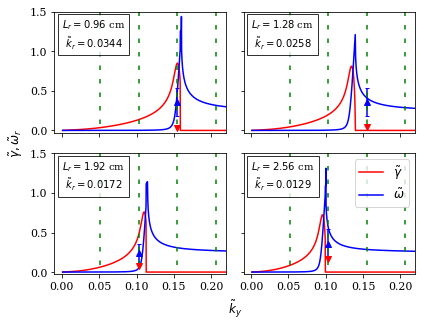

In [3]:
# create figure
f, ax = plt.subplots(2, 2,sharex=True, sharey=True,figsize=(6.5,5) )

for ii in [0,1]:
    for jj in [0,1]:
        ind = ii + jj
        if ii==1:
            ind = ind+1
        kz[ind] = np.pi/Lr[ind]*prt_base.Debye_length
        # kz = 2*np.pi/Lr*prt_base.Debye_length

        ky1 = 2*np.pi/Lt*prt_base.Debye_length
        gammax = np.ones(Nkys)
        omegax = np.ones(Nkys)

        omegax, gammax, kz[ind] = precedent_openfile(kz[ind], Nkys=Nkys, path=path)
        gamma = gammax[:len(kappa)]
        omega = omegax[:len(kappa)]


        ax[ii,jj].plot(kappa,abs(gamma),color="red",label="$\~\\gamma$")
        ax[ii,jj].plot(kappa,abs(omega),color='blue',label="$\~\\omega$")
        print(ii,jj)
    #     plt.legend()
    #     plt.title("$k_r\cdot\\lambda_D = ${:.4f}".format(kz) + ", Lr = {:.2f} cm".format(Lr*100/u.m))


        [ax[ii,jj].axvline(x=xfct, linestyle=(3,(3,6)),color="green") for xfct in [ky1,ky1*2,ky1*3,ky1*4]]
#         [plt.axvline(x=xfct, linestyle=(3,(3,6)),color="tab:red") for xfct in [ky1,ky1*2,ky1*3,ky1*4]]

    #     [plt.axvline(x=xfct, linestyle=(3,(3,6)),color="black") for xfct in [ky1*2]]
    #     [plt.axvline(x=xfct, linestyle=(3,(3,5,1,5)),color="black") for xfct in [ky1]]

        ax[ii,jj].plot(ky1*period[ind],gamma_exp[ind],"v",color="red")
        ax[ii,jj].plot(ky1*period[ind],omega_exp[ind],"^",color='blue')
        ax[ii,jj].errorbar(ky1*period[ind],omega_exp[ind],yerr=omega_err[ind],ecolor = 'blue', zorder = 1, capsize = 2)
        ax[ii,jj].grid(False)
        ax[ii,jj].set_ylim(-0.03,1.5)
        ax[ii,jj].set_xlim(-0.01,0.22)

        ax[ii,jj].tick_params(axis='x', labelsize=11)
        ax[ii,jj].tick_params(axis='y', labelsize=11)
        ax[ii,jj].text(x=0,y=1.05,s="$L_r = {:.2f}$ cm \n $\~k_r= {:.4f}$".format(Lr[ind]*100/u.m,kz[ind]),fontsize='small',bbox=dict(facecolor='white', alpha=0.8))
#         ax[ii,jj].text(x=0,y=1,s="$\~k_r= {:.4f}$".format(kz[ind]),fontsize='small')

ax[ii,jj].legend(loc="upper right")
f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("$\~k_{y}$")
plt.ylabel("$\~\\gamma,\~\\omega_{r}$")

# f.text(0.5, 0.04,"$k_{\\theta} \lambda_D$", ha='center',fontsize='large')
# f.text(0.04, 0.5, "$(\\gamma,\\omega_{r})/\\omega_{pi}$" , va='center', rotation='vertical',fontsize='large')
plt.tight_layout()
# plt.savefig('/home/petronio/Nextcloud/theseLPP/reports_vari/MTSI_paper/paper/images/'+ "changeLr_DR.eps".format(Lr,Lt),dpi=300)
# plt.show()

kz_preopen : 0.0344
kz_open : 0.0344
0 0
kz_preopen : 0.0258
kz_open : 0.0258
0 1
kz_preopen : 0.0172
kz_open : 0.0172
1 0
kz_preopen : 0.0129
kz_open : 0.0129
1 1


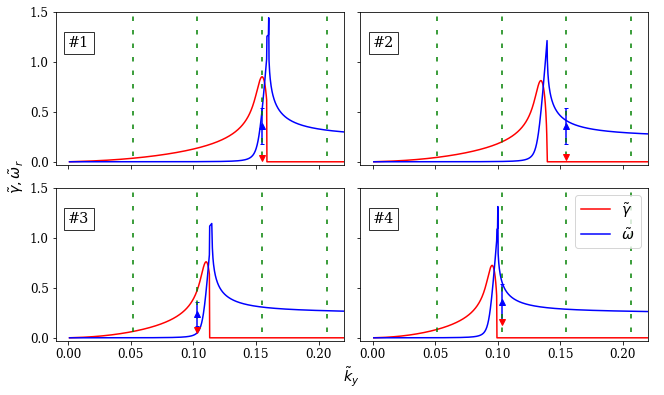

In [4]:
# create figure
f, ax = plt.subplots(2, 2,sharex=True, sharey=True,figsize=(6.5*1.5,5*1.2) )
sim_id = ["#1","#2","#3","#4"]

for ii in [0,1]:
    for jj in [0,1]:
        ind = ii + jj
        if ii==1:
            ind = ind+1
        kz[ind] = np.pi/Lr[ind]*prt_base.Debye_length
        # kz = 2*np.pi/Lr*prt_base.Debye_length

        ky1 = 2*np.pi/Lt*prt_base.Debye_length
        gammax = np.ones(Nkys)
        omegax = np.ones(Nkys)

        omegax, gammax, kz[ind] = precedent_openfile(kz[ind], Nkys=Nkys, path=path)
        gamma = gammax[:len(kappa)]
        omega = omegax[:len(kappa)]


        ax[ii,jj].plot(kappa,abs(gamma),color="red",label="$\~\\gamma$")
        ax[ii,jj].plot(kappa,abs(omega),color='blue',label="$\~\\omega$")
        print(ii,jj)
    #     plt.legend()
    #     plt.title("$k_r\cdot\\lambda_D = ${:.4f}".format(kz) + ", Lr = {:.2f} cm".format(Lr*100/u.m))


        [ax[ii,jj].axvline(x=xfct, linestyle=(3,(3,6)),color="green") for xfct in [ky1,ky1*2,ky1*3,ky1*4]]
#         [plt.axvline(x=xfct, linestyle=(3,(3,6)),color="tab:red") for xfct in [ky1,ky1*2,ky1*3,ky1*4]]

    #     [plt.axvline(x=xfct, linestyle=(3,(3,6)),color="black") for xfct in [ky1*2]]
    #     [plt.axvline(x=xfct, linestyle=(3,(3,5,1,5)),color="black") for xfct in [ky1]]

        ax[ii,jj].plot(ky1*period[ind],gamma_exp[ind],"v",color="red")
        ax[ii,jj].plot(ky1*period[ind],omega_exp[ind],"^",color='blue')
        ax[ii,jj].errorbar(ky1*period[ind],omega_exp[ind],yerr=omega_err[ind],ecolor = 'blue', zorder = 1, capsize = 2)
        ax[ii,jj].grid(False)
        ax[ii,jj].set_ylim(-0.03,1.5)
        ax[ii,jj].set_xlim(-0.01,0.22)

        ax[ii,jj].tick_params(axis='x', labelsize=12)
        ax[ii,jj].tick_params(axis='y', labelsize=12)
        ax[ii,jj].text(x=0,y=1.15,s=sim_id[ind],fontsize='large',bbox=dict(facecolor='white', alpha=0.8))
#         ax[ii,jj].text(x=0,y=1,s="$\~k_r= {:.4f}$".format(kz[ind]),fontsize='small')

ax[ii,jj].legend(loc="upper right",fontsize='large')
f.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.xlabel("$\~k_{y}$",fontsize='large')
plt.ylabel("$\~\\gamma,\~\\omega_{r}$",fontsize='large')

# f.text(0.5, 0.04,"$k_{\\theta} \lambda_D$", ha='center',fontsize='large')
# f.text(0.04, 0.5, "$(\\gamma,\\omega_{r})/\\omega_{pi}$" , va='center', rotation='vertical',fontsize='large')
plt.tight_layout()
# plt.savefig('/home/petronio/Nextcloud/theseLPP/reports_vari/MTSI_paper/paper/images/'+ "changeLr_DR.eps".format(Lr,Lt),dpi=300)
# plt.show()

kz_preopen : 0.0344
kz_open : 0.0344
kz_preopen : 0.0344
/home/petronio/Nextcloud/theseLPP/code/dispersion_MTSI/dispersion_solver/dispersion_data/change_E_Field/15000.0/kz=0.0344_omega_r.txt
/home/petronio/Nextcloud/theseLPP/code/dispersion_MTSI/dispersion_solver/dispersion_data/change_E_Field/15000.0/kz=0.0343_omega_r.txt
kz_open : 0.0345
kz_preopen : 0.0344
/home/petronio/Nextcloud/theseLPP/code/dispersion_MTSI/dispersion_solver/dispersion_data/change_E_Field/20000.0/kz=0.0344_omega_r.txt
/home/petronio/Nextcloud/theseLPP/code/dispersion_MTSI/dispersion_solver/dispersion_data/change_E_Field/20000.0/kz=0.0343_omega_r.txt
kz_open : 0.0345
kz_preopen : 0.0344
/home/petronio/Nextcloud/theseLPP/code/dispersion_MTSI/dispersion_solver/dispersion_data/change_E_Field/30000.0/kz=0.0344_omega_r.txt
/home/petronio/Nextcloud/theseLPP/code/dispersion_MTSI/dispersion_solver/dispersion_data/change_E_Field/30000.0/kz=0.0343_omega_r.txt
kz_open : 0.0345


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


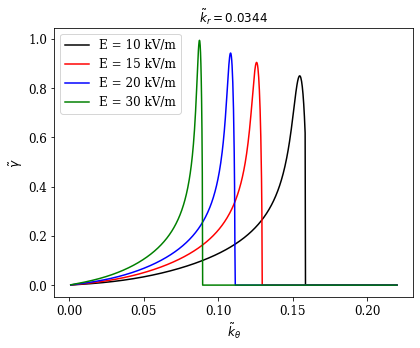

In [5]:
sentierino = os.getcwd()

kymin = 0.001
kymax = 0.22

pas = 0.00023803827751196175

Nkys = (kymax-kymin)/pas
Nkys = int(Nkys)

kys = np.arange(kymin,kymax,pas)

kz = 0.0344
fig = plt.figure(figsize=(6,5))
plt.title("$\~k_r = {:5.4f}$".format(kz))
plt.grid(False)

E_field = [10000.0,15000.0,20000.0,30000.0]
colors = ["black","red","blue","green"]

for ind,den in enumerate(E_field):
    path = sentierino + "/dispersion_data/change_E_Field/{:}/".format(den)

    omega1, gamma1, ksa= precedent_openfile(kz,Nkys+1,path)

    # plt.plot(kysref1, dispersion[i,1,:], "green", label="$\omega_r$ solver")
    # plt.plot(kysref1, dispersion[i,2,:], "magenta", label="$\gamma$ solver")
    plt.plot(kys,abs(gamma1),label = "E = {:.0f}".format(den/1000)+" kV/m",color=colors[ind])
plt.xlabel("$\~k_{\\theta}$")
plt.ylabel("$\~\\gamma $")

plt.legend()
plt.savefig('/home/petronio/Nextcloud/theseLPP/reports_vari/MTSI_paper/paper/images/'+ "change_E.eps",dpi=300)


0.0128 m 0.0024 m
0.2752344504292805
kz_preopen : 0.0258
kz_open : 0.0258
920 920


Text(0.5, 0, '$k_{\\theta}$')

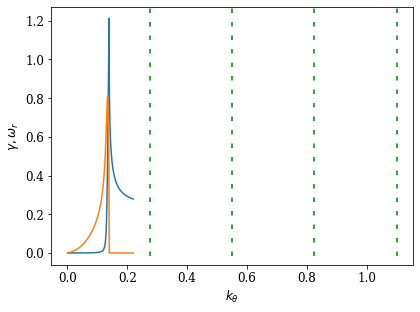

In [6]:
Lr = 1.28
Lt = 0.24

Lr = Lr/100*u.m
Lt = Lt/100*u.m

density = 5e16
sentierino = os.getcwd()
# path = sentierino + "/dispersion_data/change_E_Field/{:}/".format(den)
# path = sentierino + "/dispersion_data/change_E_Field/20000.0/"
path = current + "/dispersion_data/change_n/{:}/".format(density)


print(Lr,Lt)
density = 5e16
prt_base=PlasmaParameters(plasmaDensity=density*u.m**(-3),
                    electronTemperature=10*u.eV,
                    magneticField=0.02*u.T,
                    electricField=1e4*u.V/u.m,
                    ionTemperature=0.5*u.eV)

kz = np.pi/Lr*prt_base.Debye_length
kz = kz
# kz = 2*np.pi/Lr*prt_base.Debye_length

ky1 = 2*np.pi/Lt*prt_base.Debye_length
print(ky1)

gamma = np.ones(Nkys)
omega = np.ones(Nkys)

omega, gamma, kz = precedent_openfile(kz, Nkys=Nkys, path=path)
print(len(omega),len(kappa))
gamma = abs(gamma[:len(kappa)])
omega = abs(omega[:len(kappa)])

plt.plot(kappa,omega)
plt.plot(kappa,gamma)
[plt.axvline(x=xfct, linestyle=(3,(3,6)),color="green") for xfct in [ky1,ky1*2,ky1*3,ky1*4]]

plt.ylabel("$\\gamma,\\omega_r$")
plt.xlabel("$k_{\\theta}$")

[0.02   0.0538] m [0.005   0.01345] m
[1256.63706144  467.15132395]
kz_preopen : 0.0165
kz_open : 0.0165
[1256.63706144  467.15132395]
kz_preopen : 0.0061
kz_open : 0.0061
25785562.131637853 rad / s


/home/petronio/venv/lib/python3.7/site-packages/ipykernel_launcher.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/petronio/venv/lib/python3.7/site-packages/ipykernel_launcher.py:173: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent art

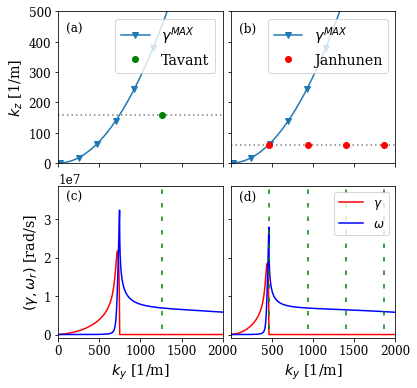

In [9]:
import matplotlib.gridspec as gridspec

Lr = np.array([2,5.38])
Lt = np.array([0.5,1.345])
period = np.array([1,1])

Lr = Lr/100*u.m
Lt = Lt/100*u.m

omega_err = omega_exp/2 /per


print(Lr,Lt)
density = 5e16 #the data have been obtained with this density. Now, data does not depend on the density! but the saved the normalized version
# density_corr = np.array([2e17/5e16,1e17/5e16])
density_corr = np.array([1,1])

prt_base=PlasmaParameters(plasmaDensity=density*u.m**(-3),
                    electronTemperature=10*u.eV,
                    magneticField=0.02*u.T,
                    electricField=2e4*u.V/u.m,
                    ionTemperature=0.5*u.eV)


kz = np.pi/Lr*prt_base.Debye_length
# kz = 2*np.pi/Lr*prt_base.Debye_length

ky1 = 2*np.pi/Lt*prt_base.Debye_length

kymin = 0.001
kymax = 0.22
pas = 0.0002383025027203481
kappa = np.arange(0.001,0.2200,0.0002383025027203481)
Nkys = len(kappa)

if kz[0] > 0.0517 :
    kymax = 0.44001
    pas = 0.0002381025027203481

kappa = np.arange(kymin,kymax,pas)

gammax = np.ones(Nkys)
omegax = np.ones(Nkys)

current = os.getcwd()
path = current + "/dispersion_data/change_n/{:}/".format(density)
path = current + "/dispersion_data/change_E_Field/20000.0/"


# omegax, gammax, kz = precedent_openfile(kz, Nkys=Nkys, path=path)

# gamma = gammax[:len(kappa)]
# omega = omegax[:len(kappa)]

# create figure
f, ax = plt.subplots(2, 2,sharex=True, sharey=False,figsize=(6.5,5*1.2) )
gs1 = gridspec.GridSpec(2, 2)
gs1.update(left=0.13, right=0.85, wspace=0.05,hspace = 0.15)
ax[0,0] = plt.subplot(gs1[0,0])
ax[0,1] = plt.subplot(gs1[0,1])
ax[1,0] = plt.subplot(gs1[1,0])
ax[1,1] = plt.subplot(gs1[1,1])

kappa = kappa/prt_base.Debye_length
for ii in [1]:
    for jj in [0,1]:
        ind = ii + jj-1
        if ii==0:
            ind = ind+1
        kz[ind] = np.pi/Lr[ind]*prt_base.Debye_length
        # kz = 2*np.pi/Lr*prt_base.Debye_length

        ky1 = 2*np.pi/Lt*u.m
        print(ky1)

        gammax = np.ones(Nkys)
        omegax = np.ones(Nkys)

        omegax, gammax, kz[ind] = precedent_openfile(kz[ind], Nkys=Nkys, path=path)
        gamma = gammax[:len(kappa)]*prt_base.ionPlasmaFrequency
        omega = omegax[:len(kappa)]*prt_base.ionPlasmaFrequency
#         kappa = kappa/prt_base.Debye_length

        ax[ii,jj].plot(kappa,abs(gamma),color="red",label="$\\gamma$")
        ax[ii,jj].plot(kappa,abs(omega),color='blue',label="$\\omega$")

        [ax[ii,jj].axvline(x=xfct, linestyle=(3,(3,6)),color="green") for xfct in [ky1[jj],ky1[jj]*2,ky1[jj]*3,ky1[jj]*4]]
#                 [ax[jj].axvline(x=xfct, linestyle=(3,(3,6)),color="green") for xfct in [ky1[jj],ky1[jj]*2,ky1[jj]*3,ky1[jj]*4]]


        ax[ii,jj].grid(False)
        ax[ii,jj].set_ylim(-0.03*prt_base.ionPlasmaFrequency/u.rad*u.s,1.5*prt_base.ionPlasmaFrequency/u.rad*u.s)
        ax[ii,jj].set_xlim(-0.01/prt_base.Debye_length*u.m,0.2/prt_base.Debye_length*u.m)
        ax[ii,jj].set_xlabel("$k_{y}$ [1/m]",fontsize="large")

        ax[ii,jj].tick_params(axis='x', labelsize=12)
        ax[ii,jj].tick_params(axis='y', labelsize=12)
#         ax[jj].text(x=0,y=1.2,s="$L_r = {:.2f}$ cm".format(Lr[ind]*100/u.m),fontsize='small')
#         ax[jj].text(x=0,y=1.1,s="$L_{\\theta}$"+"$ = {:.2f}$ cm".format(Lt[ind]*100/u.m),fontsize='small')
#         ax[jj].text(x=0,y=1,s="$k_r\lambda_D = {:.4f}$".format(kz[ind]),fontsize='small')


ax[ii,jj].legend(loc="upper right")
# f.add_subplot(111, frameon=False)
# plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
# plt.xlabel("$k_{\\theta} \lambda_D$")

plt.tight_layout()
print(prt_base.ionPlasmaFrequency)

# ax[0,0].set_ylim(0,1e7)
# ax[0,1].set_ylim(0,2e7)


prt_AT=PlasmaParameters(plasmaDensity=5e16*u.m**(-3),
                    electronTemperature=10*u.eV,
                    magneticField=0.02*u.T,
                    electricField=2e4*u.V/u.m,
                    ionTemperature=0.5*u.eV)

omega_pi = prt_AT.ionPlasmaFrequency/(u.rad/u.s)
omega_ce = prt_AT.electronCyclotronFrequency/(u.Hz)
u_norm = prt_AT.driftSpeed/prt_base.BohmSpeed
m_e = prt_AT.electronMass/u.kg
m_i = 1.67e-27*prt_base.ionMass/u.u 

kz_approx = (m_e * prt_AT.electricField /(1.6e-19*prt_AT.magneticField**2))* kappa**2
# kz_approx = (m_e/m_i + (omega_pi/omega_ce)**2)**0.5 *prt_AT.driftSpeed * (kappa)**2
# plt.subplot(2,2,3)
ax[0,0].axhline(y=np.pi/Lr[0]*u.m, linestyle=(0,(1,2)),color="gray")
ax[0,0].plot(kappa[:],kz_approx[:]*u.s/u.rad,'v-',markevery=(5,100),color="tab:blue",label="$\\gamma^{MAX}$")
ax[0,0].plot(2*np.pi/Lt[0]*u.m,np.pi/Lr[0]*u.m,"o",color="green",label = "Tavant")
ax[0,0].legend(loc="upper right",fontsize="large")

# plt.subplot(2,2,4)
ax[0,1].axhline(y=np.pi/Lr[1]*u.m, linestyle=(0,(1,2)),color="gray")
ax[0,1].plot(kappa[:],kz_approx[:]*u.s/u.rad,'v-',markevery=(5,100),color="tab:blue",label="$\\gamma^{MAX}$")
ax[0,1].plot([ky1[jj],ky1[jj]*2,ky1[jj]*3,ky1[jj]*4],np.pi/Lr[1]*u.m*np.ones(4),"o",color="red",label = "Janhunen")
ax[0,1].legend(loc="upper right",fontsize="large")

ax[0,0].set_xlim(0,2000)
ax[0,1].set_xlim(0,2000)
ax[0,0].set_xticks([0,500,1000,1500,2000])
ax[0,0].set_xticklabels([])
ax[0,1].set_xticks([0,500,1000,1500,2000])
ax[0,1].set_xticklabels([])
ax[1,0].set_xlim(0,2000)
ax[1,1].set_xlim(0,2000)
ax[1,1].set_xticks([500,1000,1500,2000])
# ax[1,1].set_xticklabels(["0","500","1000","1500","2000"])


ax[0,0].set_ylim(0,500)
ax[0,1].set_ylim(0,500)
ax[0,1].set_yticks([0,100,200,300,400,500])
ax[0,1].set_yticklabels([])
ax[1,1].set_yticks([1e7*ind for ind in np.arange(0,4)])
# ax[1,0].set_yticks([1e7*ind for ind in np.arange(0,4)])
ax[1,1].set_yticklabels([])
# ax[1,0].set_yticklabels(fontsize=10)
ax[1,0].set_ylabel("$(\\gamma,\\omega_{r})$ [rad/s]",fontsize="large")
ax[0,0].set_ylabel("$k_z$ [1/m]",fontsize="large")




ax[0,0].text(100,430,"(a)")
ax[0,1].text(100,430,"(b)")
ax[1,0].text(100,3.5e7,"(c)")
ax[1,1].text(100,3.5e7,"(d)")


# plt.savefig('/home/petronio/Nextcloud/theseLPP/reports_vari/MTSI_paper/paper/images/'+ "compareAT_SJ.eps".format(Lr,Lt),dpi=300)


kz_preopen : 0.0010
kz_open : 0.0010
kz_preopen : 0.0011
kz_open : 0.0011
kz_preopen : 0.0012
kz_open : 0.0012
kz_preopen : 0.0013
kz_open : 0.0013
kz_preopen : 0.0014
kz_open : 0.0014
kz_preopen : 0.0015
kz_open : 0.0015
kz_preopen : 0.0016
kz_open : 0.0016
kz_preopen : 0.0017
kz_open : 0.0017
kz_preopen : 0.0018
kz_open : 0.0018
kz_preopen : 0.0019
kz_open : 0.0019
kz_preopen : 0.0020
kz_open : 0.0020
kz_preopen : 0.0021
kz_open : 0.0021
kz_preopen : 0.0022
kz_open : 0.0022
kz_preopen : 0.0023
kz_open : 0.0023
kz_preopen : 0.0024
kz_open : 0.0024
kz_preopen : 0.0025
kz_open : 0.0025
kz_preopen : 0.0026
kz_open : 0.0026
kz_preopen : 0.0027
kz_open : 0.0027
kz_preopen : 0.0028
kz_open : 0.0028
kz_preopen : 0.0029
kz_open : 0.0029
kz_preopen : 0.0030
kz_open : 0.0030
kz_preopen : 0.0031
kz_open : 0.0031
kz_preopen : 0.0032
kz_open : 0.0032
kz_preopen : 0.0033
kz_open : 0.0033
kz_preopen : 0.0034
kz_open : 0.0034
kz_preopen : 0.0035
kz_open : 0.0035
kz_preopen : 0.0036
kz_open : 0.0036
k

/home/petronio/venv/lib/python3.7/site-packages/ipykernel_launcher.py:74: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/petronio/venv/lib/python3.7/site-packages/ipykernel_launcher.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
/home/petronio/venv/lib/python3.7/site-packages/ipykernel_launcher.py:90: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
/home/petronio/venv/lib/python3.7/site-

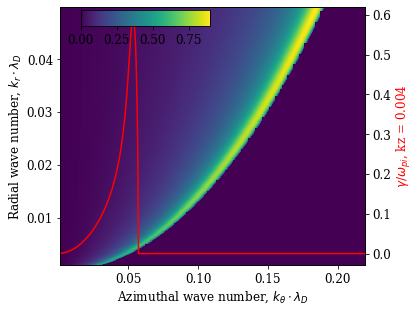

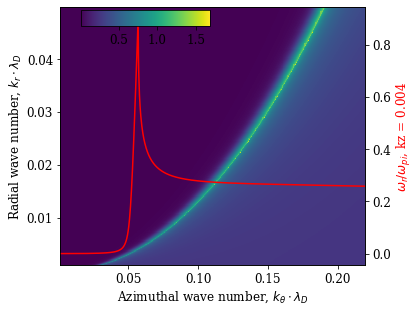

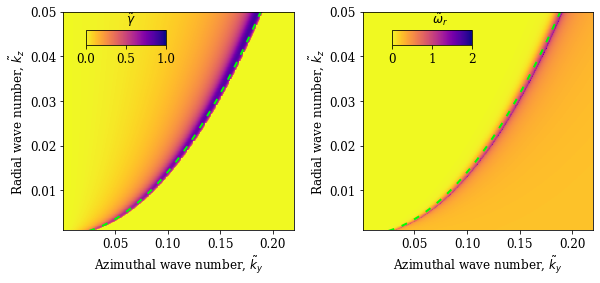

In [137]:
from plasmapy.formulary.dispersionfunction import plasma_dispersion_func
import numpy as np
import matplotlib.pyplot as plt
from util.iaw import precedent_guess,precedent_guess_mod
from util.tools_dispersion import open_disp_file,find_max_gamma,verification_dispersion,precedent_openfile
from util.parameters import PlasmaParameters
from astropy.constants import m_e, m_p
from astropy import units as u
import os
import rcparams

import argparse

density = 5e16
# density = 2e17

L_theta = 1.28e-2*u.m
prt_base=PlasmaParameters(plasmaDensity=density*u.m**(-3),
                    electronTemperature=10*u.eV,
                    magneticField=0.02*u.T,
                    electricField=1e4*u.V/u.m,
                    ionTemperature=0.5*u.eV)

kz = 0.001

kymin = 0.001
kymax = 0.22
pas = 0.0002383025027203481

if kz > 0.0517 :
    kymax = 0.44001
    pas = 0.0002381025027203481

kappa = np.arange(kymin,kymax,pas)
Nkys = len(kappa)

kzetas = np.arange(0.0010,0.05,0.0001)
# kzetas = np.arange(0.0010,0.005,0.0001)

current = os.getcwd()
path = current + "/dispersion_data/change_n/{:}/".format(density)
# path = current + "/dispersion_data/change_E_Field/30000.0/"

omega_plot = np.zeros((len(kzetas),len(kappa)))
gamma_plot = np.zeros((len(kzetas),len(kappa)))
kz_plot = np.zeros(len(kzetas))

for ind, kz in enumerate(kzetas) :
    omega_plot[ind,:], gamma_plot[ind,:], kz_plot[ind] = precedent_openfile(kz, Nkys=Nkys, path=path)
omega_plot = abs(omega_plot)
gamma_plot = abs(gamma_plot)

# plt.figure()
# plt.pcolor(kappa,kz_plot,gamma_plot[:,:])
# plt.colorbar()
# plt.xlabel("Azimuthal wave number, $k_{\\theta} \cdot \\lambda_D$")
# plt.ylabel("Radial wave number, $k_{r} \cdot \\lambda_D$")
#
# plt.figure()
# plt.pcolor(kappa,kz_plot,omega_plot[:,:])
# plt.colorbar()
# plt.xlabel("Azimuthal wave number, $k_{\\theta} \cdot \\lambda_D$")
# plt.ylabel("Radial wave number, $k_{r} \cdot \\lambda_D$")


index = 334
print(kzetas[index-5:index+5])
index = 30

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel("Azimuthal wave number, $k_{\\theta} \cdot \\lambda_D$")
ax1.set_ylabel("Radial wave number, $k_{r} \cdot \\lambda_D$")
im = ax1.pcolor(kappa,kz_plot,gamma_plot[:,:])

cax = fig.add_axes([0.2, 0.9, 0.3, 0.05])
# cax = fig.add_axes([0.37, 0.9, 0.3, 0.05])

fig.colorbar(im,cax=cax, orientation='horizontal')
ax2.set_ylabel("$\\gamma/\\omega_{pi}$"+", kz = {:.3f}".format(kzetas[index]),color='red')
ax2.plot(kappa,gamma_plot[index,:],color='red')
fig.tight_layout()
# plt.savefig("/home/petronio/Downloads/gamma2D.png")


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_xlabel("Azimuthal wave number, $k_{\\theta} \cdot \\lambda_D$")
ax1.set_ylabel("Radial wave number, $k_{r} \cdot \\lambda_D$")
im = ax1.pcolor(kappa,kz_plot,omega_plot[:,:])

cax = fig.add_axes([0.2, 0.9, 0.3, 0.05])
# cax = fig.add_axes([0.37, 0.9, 0.3, 0.05])

fig.colorbar(im,cax=cax, orientation='horizontal')
ax2.set_ylabel("$\\omega_r/\\omega_{pi}$"+", kz = {:.3f}".format(kzetas[index]),color='red')
ax2.plot(kappa,omega_plot[index,:],color='red')
fig.tight_layout()
# plt.savefig("/home/petronio/Downloads/omega2D.png")


# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
secondary_axis = False #set to True to plot two examples of DR over the map

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
cmap = "viridis_r"
cmap = "plasma_r"

fig.set_figheight(4.1)
fig.set_figwidth(8.5)

color1="red"
ax1 = axes[0]


# ax1.set_xlabel("Azimuthal wave number, $k_{\\theta} \cdot \\lambda_D$")
# ax1.set_ylabel("Radial wave number, $k_{r} \cdot \\lambda_D$")
ax1.set_xlabel("Azimuthal wave number, $\~{k}_{y}$")
ax1.set_ylabel("Radial wave number, $\~{k}_{z}$")
im = ax1.pcolor(kappa,kz_plot,gamma_plot[:,:],cmap=cmap,vmin=0,vmax=1)

cax = fig.add_axes([0.15, 0.825, 0.13, 0.05])
fig.text(0.15+0.13/2,0.9,"$\~{\\gamma}$")
# cax = fig.add_axes([0.37, 0.9, 0.3, 0.05])

cbar = fig.colorbar(im,cax=cax, orientation='horizontal')
cbar.set_ticks([0,0.5,1])

if secondary_axis:
    ax2 = ax1.twinx()
    ax2.tick_params(colors=color1)
    ax2.set_ylabel("$\\gamma/\\omega_{pi}$"+", for $k_r \cdot \\lambda_D$ = {:.3f}".format(kzetas[index]),color=color1)
    ax2.plot(kappa,gamma_plot[index,:],color=color1)
# fig.tight_layout()


# fig, ax1 = plt.subplots(1,2,2)
color2 = "blue"
ax3 = axes[1]

# ax4.major_ticklabels.set_color(color2)

ax3.set_xlabel("Azimuthal wave number, $\~{k}_{y}$")
ax3.set_ylabel("Radial wave number, $\~{k}_{z}$")
im = ax3.pcolor(kappa,kz_plot,omega_plot[:,:],cmap=cmap,vmin=0,vmax=2)

cax = fig.add_axes([0.65, 0.825, 0.13, 0.05])
fig.text(0.65+0.13/2,0.9,"$\~{\\omega}_r$")

cbar = fig.colorbar(im,cax=cax, orientation='horizontal')
cbar.set_ticks([0,1,2])

# cbar.solids.set_edgecolor("face")
if secondary_axis:
    ax4 = ax3.twinx()
    ax4.tick_params(colors=color2)
    ax4.set_ylabel("$\\omega_r/\\omega_{pi}$"+", for $k_r \cdot \\lambda_D$ = {:.3f}".format(kzetas[index]),color=color2)
    ax4.plot(kappa,omega_plot[index,:],color=color2)
fig.tight_layout()

##calculation with approx

# # %constants
# m_e=9e-31 
# m_p=1.67e-27 
# eps0=8.82e-12 
# e=1.6e-19 

# # %inputs
# M=131*m_p # %Xenon mass
# n_0=5e16 
# E_0=1e4 
# B_0=200e-4 
# u_0=E_0/B_0 
# T_e=10 # % In volts

# # %Physics parameters
# lambda_D=(eps0*e*T_e/(n_0*e**2))**0.5
# u_B=(e*T_e/M)**0.5
# omega_pi=(n_0*e**2/(M*eps0))**0.5
# omega_ce=e*B_0/m_e 
# print(omega_pi)

# # %Normalized parameters
# u_norm=u_0/u_B
# k_r=0.0129

# kz_approx = (m_e/M + (omega_pi/omega_ce)**2)**0.5 *u_norm * kappa**2

omega_pi = prt_base.ionPlasmaFrequency/(u.rad/u.s)
omega_ce = prt_base.electronCyclotronFrequency/(u.Hz)
u_norm = prt_base.driftSpeed/prt_base.BohmSpeed
m_e = prt_base.electronMass/u.kg
m_i = 1.67e-27*prt_base.ionMass/u.u 

kz_approx = (m_e/m_i + (omega_pi/omega_ce)**2)**0.5 *u_norm * kappa**2

ax1.plot(kappa,kz_approx,'--',c='lime',linewidth=2, linestyle=(1,(3,4)))
ax3.plot(kappa,kz_approx,'--',c='lime',linewidth=2, linestyle=(1,(3,4)))

ax1.set_ylim(0.001,0.05)
ax3.set_ylim(0.001,0.05)

plt.tight_layout()
# plt.savefig('/home/petronio/Nextcloud/theseLPP/reports_vari/MTSI_paper/paper/images/gamma_omega2D.png',dpi=300)



In [126]:
# ### make the 1D plots in the other 
# Lt = 0.64 
# periods = 2
# Lr = 2.56

# print(prt_base.Debye_length/u.m)
# Lt = Lt/100
# kt = 2*np.pi/Lt * periods * prt_base.Debye_length/u.m

# Lr = Lr/100
# kr = np.pi/Lr * prt_base.Debye_length/u.m*2
# print(kt,kr)

# for ind in range(len(kappa)):
#     if (kappa[ind]>kt):
#         index = ind
#         print(ind)
#         break
        
# print(kappa[index])


# plt.plot(kz_plot,gamma_plot[:,ind],color="red")
# plt.plot(kz_plot,omega_plot[:,ind],color="blue")

# gamma_exp = np.array([0.034,0.044,0.079,0.16])
# omega_exp = np.array([0.27,0.27,0.27,0.4])
# [plt.axvline(x=xfct, linestyle=(3,(3,6)),color="green") for xfct in [ky1,ky1*2,ky1*3,ky1*4]]

# plt.plot(kr,gamma_exp[0],"*",color="red")
# plt.plot(kr,omega_exp[0],"*",color="blue")

kz_preopen : 0.0010
kz_open : 0.0010
kz_preopen : 0.0013
kz_open : 0.0013
kz_preopen : 0.0016
kz_open : 0.0016
kz_preopen : 0.0019
kz_open : 0.0019
kz_preopen : 0.0022
kz_open : 0.0022
kz_preopen : 0.0025
kz_open : 0.0025
kz_preopen : 0.0028
kz_open : 0.0028
kz_preopen : 0.0031
kz_open : 0.0031
kz_preopen : 0.0034
kz_open : 0.0034
kz_preopen : 0.0037
kz_open : 0.0037
kz_preopen : 0.0040
kz_open : 0.0040
kz_preopen : 0.0043
kz_open : 0.0043
kz_preopen : 0.0046
kz_open : 0.0046
kz_preopen : 0.0049
kz_open : 0.0049
kz_preopen : 0.0052
kz_open : 0.0052
kz_preopen : 0.0055
kz_open : 0.0055
kz_preopen : 0.0058
kz_open : 0.0058
kz_preopen : 0.0061
kz_open : 0.0061
kz_preopen : 0.0064
kz_open : 0.0064
kz_preopen : 0.0067
kz_open : 0.0067
kz_preopen : 0.0070
kz_open : 0.0070
kz_preopen : 0.0073
kz_open : 0.0073
kz_preopen : 0.0076
kz_open : 0.0076
kz_preopen : 0.0079
kz_open : 0.0079
kz_preopen : 0.0082
kz_open : 0.0082
kz_preopen : 0.0085
kz_open : 0.0085
kz_preopen : 0.0088
kz_open : 0.0088
k

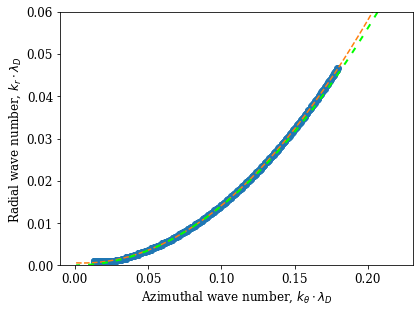

In [127]:
## Find the postion of gamma_max for different electric fields

density = 5e16
kzetas = np.arange(0.0010,0.05,0.0003)
# kzetas = np.arange(0.0010,0.005,0.0001)

current = os.getcwd()
path = current + "/dispersion_data/change_n/{:}/".format(density)
# path = current + "/dispersion_data/change_E_Field/15000.0/"

omega_plot = np.zeros((len(kzetas),len(kappa)))
gamma_plot = np.zeros((len(kzetas),len(kappa)))
kz_plot = np.zeros(len(kzetas))

for ind, kz in enumerate(kzetas) :
    omega_plot[ind,:], gamma_plot[ind,:], kz_plot[ind] = precedent_openfile(kz, Nkys=Nkys, path=path)
omega_plot = abs(omega_plot)
gamma_plot = abs(gamma_plot)


fig, ax1 = plt.subplots()
ax1.set_xlabel("Azimuthal wave number, $k_{\\theta} \cdot \\lambda_D$")
ax1.set_ylabel("Radial wave number, $k_{r} \cdot \\lambda_D$")
# im = ax1.pcolor(kappa,kz_plot,gamma_plot[:,:])
# fig.colorbar(im)

# fig.colorbar(im,cax=cax, orientation='horizontal')
fig.tight_layout()

massimi = np.zeros(len(gamma_plot[1,:]))
for ind in np.arange(len(massimi)):
    massimi[ind] = kz_plot[np.argmax(gamma_plot[:,ind])]

print(len(massimi))
# plt.figure()
ax1.plot(kappa[50:750],massimi[50:750],'o')
ax1.set_ylim(0,0.06)

from scipy.optimize import curve_fit
def quadratic(x,a,b,c):
    return a*x**2+b*x+c

kappa10 = kappa[50:750]
massimi10 = massimi[50:750]
pars10, cov = curve_fit(f=quadratic, xdata=kappa10, ydata=massimi10, p0=[0, 0,0], bounds=(-np.inf, np.inf))

# pars[0]=2
# pars[1]=0.02
# pars[2]=0

ax1.plot(kappa,quadratic(kappa,pars10[0],pars10[1],pars10[2]),"--")


prt_base=PlasmaParameters(plasmaDensity=density*u.m**(-3),
                    electronTemperature=10*u.eV,
                    magneticField=0.02*u.T,
                    electricField=1e4*u.V/u.m,
                    ionTemperature=0.5*u.eV)

omega_pi = prt_base.ionPlasmaFrequency/(u.rad/u.s)
omega_ce = prt_base.electronCyclotronFrequency/(u.Hz)
u_norm = prt_base.driftSpeed/prt_base.BohmSpeed
m_e = prt_base.electronMass/u.kg
m_i = 1.67e-27*prt_base.ionMass/u.u 

kz_approx_10k = (m_e/m_i + (omega_pi/omega_ce)**2)**0.5 *u_norm * kappa**2

ax1.plot(kappa,kz_approx_10k,'--',c='lime',linewidth=2, linestyle=(1,(3,4)))

print("~~~~~~~~~~~~~~~~~",(m_e/m_i + (omega_pi/omega_ce)**2)**0.5 *u_norm)

# print("parameters: ",pars)

kz_preopen : 0.0009
kz_open : 0.0009
kz_preopen : 0.0012
kz_open : 0.0012
kz_preopen : 0.0015
kz_open : 0.0015
kz_preopen : 0.0018
kz_open : 0.0018
kz_preopen : 0.0021
kz_open : 0.0021
kz_preopen : 0.0024
kz_open : 0.0024
kz_preopen : 0.0027
kz_open : 0.0027
kz_preopen : 0.0030
kz_open : 0.0030
kz_preopen : 0.0033
kz_open : 0.0033
kz_preopen : 0.0036
kz_open : 0.0036
kz_preopen : 0.0039
kz_open : 0.0039
kz_preopen : 0.0042
kz_open : 0.0042
kz_preopen : 0.0045
kz_open : 0.0045
kz_preopen : 0.0048
kz_open : 0.0048
kz_preopen : 0.0051
kz_open : 0.0051
kz_preopen : 0.0054
kz_open : 0.0054
kz_preopen : 0.0057
kz_open : 0.0057
kz_preopen : 0.0060
kz_open : 0.0060
kz_preopen : 0.0063
kz_open : 0.0063
kz_preopen : 0.0066
kz_open : 0.0066
kz_preopen : 0.0069
kz_open : 0.0069
kz_preopen : 0.0072
kz_open : 0.0072
kz_preopen : 0.0075
kz_open : 0.0075
kz_preopen : 0.0078
kz_open : 0.0078
kz_preopen : 0.0081
kz_open : 0.0081
kz_preopen : 0.0084
kz_open : 0.0084
kz_preopen : 0.0087
kz_open : 0.0087
k

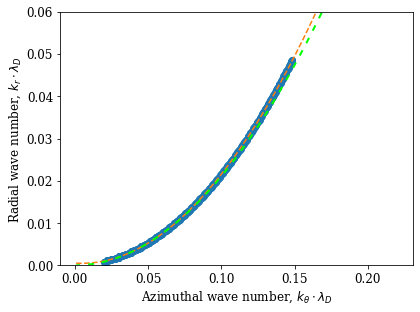

In [128]:
kzetas = np.arange(0.0009,0.049,0.0003)
# kzetas = np.arange(0.0010,0.005,0.0001)

current = os.getcwd()
path = current + "/dispersion_data/change_E_Field/15000.0/"

omega_plot = np.zeros((len(kzetas),len(kappa)))
gamma_plot = np.zeros((len(kzetas),len(kappa)))
kz_plot = np.zeros(len(kzetas))

for ind, kz in enumerate(kzetas) :
    omega_plot[ind,:], gamma_plot[ind,:], kz_plot[ind] = precedent_openfile(kz, Nkys=Nkys, path=path)
omega_plot = abs(omega_plot)
gamma_plot = abs(gamma_plot)


fig, ax1 = plt.subplots()
ax1.set_xlabel("Azimuthal wave number, $k_{\\theta} \cdot \\lambda_D$")
ax1.set_ylabel("Radial wave number, $k_{r} \cdot \\lambda_D$")
# im = ax1.pcolor(kappa,kz_plot,gamma_plot[:,:])
# fig.colorbar(im)

# fig.colorbar(im,cax=cax, orientation='horizontal')
fig.tight_layout()

massimi = np.zeros(len(gamma_plot[1,:]))
for ind in np.arange(len(massimi)):
    massimi[ind] = kz_plot[np.argmax(gamma_plot[:,ind])]

print(len(massimi))
# plt.figure()
ax1.plot(kappa[80:620],massimi[80:620],'o')

ax1.set_ylim(0,0.06)

from scipy.optimize import curve_fit
def quadratic(x,a,b,c):
    return a*x**2+b*x+c

kappa15 = kappa[80:620]
massimi15 = massimi[80:620]
pars15, cov = curve_fit(f=quadratic, xdata=kappa15, ydata=massimi15, p0=[0, 0,0], bounds=(-np.inf, np.inf))

print(kappa[1])
# pars[0]=2
# pars[1]=0.02
# pars[2]=0

ax1.plot(kappa,quadratic(kappa,pars15[0],pars15[1],pars15[2]),"--")

prt_base=PlasmaParameters(plasmaDensity=density*u.m**(-3),
                    electronTemperature=10*u.eV,
                    magneticField=0.02*u.T,
                    electricField=1.5e4*u.V/u.m,
                    ionTemperature=0.5*u.eV)

omega_pi = prt_base.ionPlasmaFrequency/(u.rad/u.s)
omega_ce = prt_base.electronCyclotronFrequency/(u.Hz)
u_norm = prt_base.driftSpeed/prt_base.BohmSpeed
m_e = prt_base.electronMass/u.kg
m_i = 1.67e-27*prt_base.ionMass/u.u 

kz_approx_15k = (m_e/m_i + (omega_pi/omega_ce)**2)**0.5 *u_norm * kappa**2

ax1.plot(kappa,kz_approx_15k,'--',c='lime',linewidth=2, linestyle=(1,(3,4)))



kz_preopen : 0.0009
kz_open : 0.0009
kz_preopen : 0.0012
kz_open : 0.0012
kz_preopen : 0.0015
kz_open : 0.0015
kz_preopen : 0.0018
kz_open : 0.0018
kz_preopen : 0.0021
kz_open : 0.0021
kz_preopen : 0.0024
kz_open : 0.0024
kz_preopen : 0.0027
kz_open : 0.0027
kz_preopen : 0.0030
kz_open : 0.0030
kz_preopen : 0.0033
kz_open : 0.0033
kz_preopen : 0.0036
kz_open : 0.0036
kz_preopen : 0.0039
kz_open : 0.0039
kz_preopen : 0.0042
kz_open : 0.0042
kz_preopen : 0.0045
kz_open : 0.0045
kz_preopen : 0.0048
kz_open : 0.0048
kz_preopen : 0.0051
kz_open : 0.0051
kz_preopen : 0.0054
kz_open : 0.0054
kz_preopen : 0.0057
kz_open : 0.0057
kz_preopen : 0.0060
kz_open : 0.0060
kz_preopen : 0.0063
kz_open : 0.0063
kz_preopen : 0.0066
kz_open : 0.0066
kz_preopen : 0.0069
kz_open : 0.0069
kz_preopen : 0.0072
kz_open : 0.0072
kz_preopen : 0.0075
kz_open : 0.0075
kz_preopen : 0.0078
kz_open : 0.0078
kz_preopen : 0.0081
kz_open : 0.0081
kz_preopen : 0.0084
kz_open : 0.0084
kz_preopen : 0.0087
kz_open : 0.0087
k

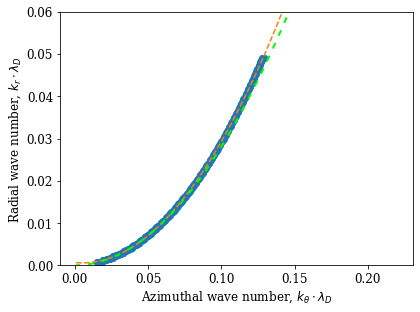

In [129]:

kzetas = np.arange(0.0009,0.05,0.0003)
# kzetas = np.arange(0.0010,0.005,0.0001)

current = os.getcwd()
path = current + "/dispersion_data/change_E_Field/20000.0/"

omega_plot = np.zeros((len(kzetas),len(kappa)))
gamma_plot = np.zeros((len(kzetas),len(kappa)))
kz_plot = np.zeros(len(kzetas))

for ind, kz in enumerate(kzetas) :
    omega_plot[ind,:], gamma_plot[ind,:], kz_plot[ind] = precedent_openfile(kz, Nkys=Nkys, path=path)
omega_plot = abs(omega_plot)
gamma_plot = abs(gamma_plot)


fig, ax1 = plt.subplots()
ax1.set_xlabel("Azimuthal wave number, $k_{\\theta} \cdot \\lambda_D$")
ax1.set_ylabel("Radial wave number, $k_{r} \cdot \\lambda_D$")
# im = ax1.pcolor(kappa,kz_plot,gamma_plot[:,:])
# fig.colorbar(im)

# fig.colorbar(im,cax=cax, orientation='horizontal')
fig.tight_layout()

massimi = np.zeros(len(gamma_plot[1,:]))
for ind in np.arange(len(massimi)):
    massimi[ind] = kz_plot[np.argmax(gamma_plot[:,ind])]

print(len(massimi))
# plt.figure()
ax1.plot(kappa[60:540],massimi[60:540],'o')
ax1.set_ylim(0,0.06)

from scipy.optimize import curve_fit
def quadratic(x,a,b,c):
    return a*x**2+b*x+c

kappa20 = kappa[60:540]
massimi20 = massimi[60:540]
pars20, cov = curve_fit(f=quadratic, xdata=kappa20, ydata=massimi20, p0=[0, 0,0], bounds=(-np.inf, np.inf))

# pars[0]=2
# pars[1]=0.02
# pars[2]=0

ax1.plot(kappa,quadratic(kappa,pars20[0],pars20[1],pars20[2]),"--")

prt_base=PlasmaParameters(plasmaDensity=density*u.m**(-3),
                    electronTemperature=10*u.eV,
                    magneticField=0.02*u.T,
                    electricField=2e4*u.V/u.m,
                    ionTemperature=0.5*u.eV)

omega_pi = prt_base.ionPlasmaFrequency/(u.rad/u.s)
omega_ce = prt_base.electronCyclotronFrequency/(u.Hz)
u_norm = prt_base.driftSpeed/prt_base.BohmSpeed
m_e = prt_base.electronMass/u.kg
m_i = 1.67e-27*prt_base.ionMass/u.u 

kz_approx_20k = (m_e/m_i + (omega_pi/omega_ce)**2)**0.5 *u_norm * kappa**2

ax1.plot(kappa,kz_approx_20k,'--',c='lime',linewidth=2, linestyle=(1,(3,4)))

kz_preopen : 0.0003
kz_open : 0.0003
kz_preopen : 0.0006
kz_open : 0.0006
kz_preopen : 0.0009
kz_open : 0.0009
kz_preopen : 0.0012
kz_open : 0.0012
kz_preopen : 0.0015
kz_open : 0.0015
kz_preopen : 0.0018
kz_open : 0.0018
kz_preopen : 0.0021
kz_open : 0.0021
kz_preopen : 0.0024
kz_open : 0.0024
kz_preopen : 0.0027
kz_open : 0.0027
kz_preopen : 0.0030
kz_open : 0.0030
kz_preopen : 0.0033
kz_open : 0.0033
kz_preopen : 0.0036
kz_open : 0.0036
kz_preopen : 0.0039
kz_open : 0.0039
kz_preopen : 0.0042
kz_open : 0.0042
kz_preopen : 0.0045
kz_open : 0.0045
kz_preopen : 0.0048
kz_open : 0.0048
kz_preopen : 0.0051
kz_open : 0.0051
kz_preopen : 0.0054
kz_open : 0.0054
kz_preopen : 0.0057
kz_open : 0.0057
kz_preopen : 0.0060
kz_open : 0.0060
kz_preopen : 0.0063
kz_open : 0.0063
kz_preopen : 0.0066
kz_open : 0.0066
kz_preopen : 0.0069
kz_open : 0.0069
kz_preopen : 0.0072
kz_open : 0.0072
kz_preopen : 0.0075
kz_open : 0.0075
kz_preopen : 0.0078
kz_open : 0.0078
kz_preopen : 0.0081
kz_open : 0.0081
k

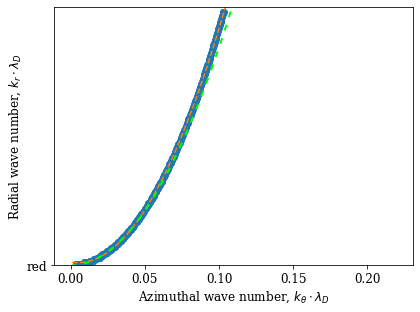

In [130]:

kzetas = np.arange(0.0003,0.049,0.0003)
# kzetas = np.arange(0.0010,0.005,0.0001)

current = os.getcwd()
path = current + "/dispersion_data/change_E_Field/30000.0/"

omega_plot = np.zeros((len(kzetas),len(kappa)))
gamma_plot = np.zeros((len(kzetas),len(kappa)))
kz_plot = np.zeros(len(kzetas))

for ind, kz in enumerate(kzetas) :
    omega_plot[ind,:], gamma_plot[ind,:], kz_plot[ind] = precedent_openfile(kz, Nkys=Nkys, path=path)
omega_plot = abs(omega_plot)
gamma_plot = abs(gamma_plot)


fig, ax1 = plt.subplots()
ax1.set_xlabel("Azimuthal wave number, $k_{\\theta} \cdot \\lambda_D$")
ax1.set_ylabel("Radial wave number, $k_{r} \cdot \\lambda_D$")
# im = ax1.pcolor(kappa,kz_plot,gamma_plot[:,:])
# fig.colorbar(im)

# fig.colorbar(im,cax=cax, orientation='horizontal')
fig.tight_layout()

massimi = np.zeros(len(gamma_plot[1,:]))
for ind in np.arange(len(massimi)):
    massimi[ind] = kz_plot[np.argmax(gamma_plot[:,ind])]

print(len(massimi))
# plt.figure()
ax1.plot(kappa[10:430],massimi[10:430],'o')
ax1.set_ylim(0,0.05)

from scipy.optimize import curve_fit
def quadrati(x,a,b):
    return a*x**2+b*x

kappa30 = kappa[10:430]
massimi30 = massimi[10:430]
pars30, cov = curve_fit(f=quadratic, xdata=kappa30, ydata=massimi30, p0=[0, 0,0], bounds=(-np.inf, np.inf))
pars31, cov = curve_fit(f=quadrati, xdata=kappa30, ydata=massimi30, p0=[0, 0], bounds=(-np.inf, np.inf))

ax1.plot(kappa,quadratic(kappa,pars30[0],pars30[1],pars30[2]),"--","red")
# ax1.plot(kappa,quadrati(kappa,pars31[0],pars31[1]),"--")

prt_base=PlasmaParameters(plasmaDensity=density*u.m**(-3),
                    electronTemperature=10*u.eV,
                    magneticField=0.02*u.T,
                    electricField=3e4*u.V/u.m,
                    ionTemperature=0.5*u.eV)

omega_pi = prt_base.ionPlasmaFrequency/(u.rad/u.s)
omega_ce = prt_base.electronCyclotronFrequency/(u.Hz)
u_norm = prt_base.driftSpeed/prt_base.BohmSpeed
m_e = prt_base.electronMass/u.kg
m_i = 1.67e-27*prt_base.ionMass/u.u 

kz_approx_30k = (m_e/m_i + (omega_pi/omega_ce)**2)**0.5 *u_norm * kappa**2

ax1.plot(kappa,kz_approx_30k,'--',c='lime',linewidth=2, linestyle=(1,(3,4)))

/home/petronio/venv/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


[array([ 1.51936215e+00, -1.65800170e-02,  5.96338069e-04]), array([ 2.32398081e+00, -2.21215504e-02,  5.33551627e-04]), array([ 3.18568370e+00, -3.24165607e-02,  6.60445223e-04]), array([ 5.00858433e+00, -4.97256726e-02,  6.44748937e-04])]

kz_preopen : 0.0345
kz_open : 0.0345
kz_preopen : 0.0345
kz_open : 0.0345
kz_preopen : 0.0345
kz_open : 0.0345
kz_preopen : 0.0345
kz_open : 0.0345


/home/petronio/venv/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


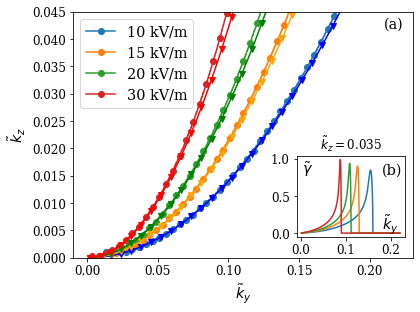

In [136]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("$\~k_{y}$",fontsize='large')
ax1.set_ylabel("$\~k_{z}$",fontsize='large')
ax1.set_ylim(0,0.045)
massimis = [massimi10,massimi15,massimi20,massimi30]
kappass = [kappa10,kappa15,kappa20,kappa30]
parss = [pars10,pars15,pars20,pars30]
labels = ["10 kV/m","15 kV/m","20 kV/m","30 kV/m"]
colors = ["tab:blue","tab:orange","tab:green","tab:red"]

print(parss)
for Efield in range(4):
    ax1.plot(kappass[Efield],massimis[Efield],'o-',markevery=20,label=labels[Efield],color=colors[Efield])
ax1.legend(fontsize='large')
print()


left, bottom, width, height = [0.7, 0.25, 0.25, 0.25]
ax2 = fig.add_axes([left, bottom, width, height])
E_field = [10000.0,15000.0,20000.0,30000.0]
colors2 = ["blue","orange","green","red"]

parab = [kz_approx_10k,kz_approx_15k,kz_approx_20k,kz_approx_30k]
kz = 0.0345
for ind,den in enumerate(E_field):
    path = sentierino + "/dispersion_data/change_E_Field/{:}/".format(den)

    omega1, gamma1, ksa= precedent_openfile(kz,Nkys+1,path)
    pars = parss[ind]
#     ax1.plot(kappa,quadratic(kappa,pars[0],pars[1],pars[2]),"--",color="black")
    ax1.plot(kappa,parab[ind],'v-',markevery=(5,30),color=colors2[ind])

    # plt.plot(kysref1, dispersion[i,1,:], "green", label="$\omega_r$ solver")
    # plt.plot(kysref1, dispersion[i,2,:], "magenta", label="$\gamma$ solver")
    ax2.plot(kys,abs(gamma1),label = "E = {:.0f}".format(den/1000)+" kV/m",color=colors[ind])
ax2.text(x=0.18,y=0.05,s="$\~k_{y}$",fontsize='large')
ax2.text(x=0.001,y=0.8,s="$\~\\gamma$",fontsize='large')    
ax2.text(x=0.18,y=0.8,s="(b)",fontsize='large')
ax2.set_title("$\~k_z = ${:.3f}".format(kz))
ax1.text(x=0.21,y=0.042,s="(a)",fontsize='large')
# plt.savefig('/home/petronio/Nextcloud/theseLPP/reports_vari/MTSI_paper/paper/images/change_E1.eps',dpi=300)


In [ ]:
[print(parss[ind]) for ind in [0,1,2,3]]

In [ ]:
# %constants
m_e=9e-31 
m_p=1.67e-27 
eps0=8.82e-12 
e=1.6e-19 

# %inputs
M=131*m_p # %Xenon mass
n_0=5e16 
E_0=1e4 
B_0=200e-4 
u_0=E_0/B_0 
T_e=10 # % In volts

# %Physics parameters
lambda_D=(eps0*e*T_e/(n_0*e**2))**2
u_B=(e*T_e/M)**2
omega_pi=(n_0*e**2/(M*e**2))**2
omega_ce=e*B_0/m_e 

# %Normalized parameters
u_norm=u_0/u_B 
k_r=0.0129
A=(M/m_e)*k_r**2/u_norm**2 
print(A)
k_theta=np.linspace(0.05,0.3,100)

# print(A,k_theta,1/(1-A/k_theta**4))

# %Solution and plot
omega = np.zeros(len(k_theta),dtype=complex)

# omega[1] = omega[1]**0.5
for ind in range(len(k_theta)):
    omega[ind] = (np.complex(1/(1-A/k_theta[ind]**4)))**0.5
    
# print(-1.35010170e-23,-1.35010170e-23**0.5)
plt.plot(k_theta,np.imag(omega))
plt.plot(k_theta,np.real(omega),'b') 
plt.axvline(x=A**0.25, linestyle=(3,(3,6)),color="green") 
# plt.plot(k_theta,np.real(omega),'b') 